### Importations

In [1]:
import warnings
from sklearn.datasets import fetch_openml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# Ignorer les avertissements spécifiques à la conversion des données
warnings.filterwarnings(action='ignore', category=UserWarning)

### Télécharger le jeu de données MNIST

In [2]:
mnist = fetch_openml('mnist_784', version=1)
# récupérer les clés du dictionnaire
print(mnist.keys())
# Accéder aux données et aux annotations
X, y = mnist["data"], mnist["target"]

# Afficher les dimensions des données
X.shape 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


(70000, 784)

In [3]:
# taille
y.shape

(70000,)

### Récupère le 36000ème élément du jeu de données, le transforme en tableau 28x28

<Axes: >

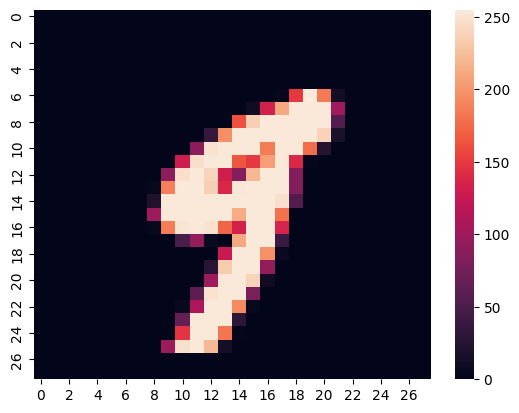

In [4]:
image_to_display = X.iloc[36000].to_numpy().reshape(28, 28)

# Affiche le tableau 28x28
sns.heatmap(image_to_display)

<Axes: >

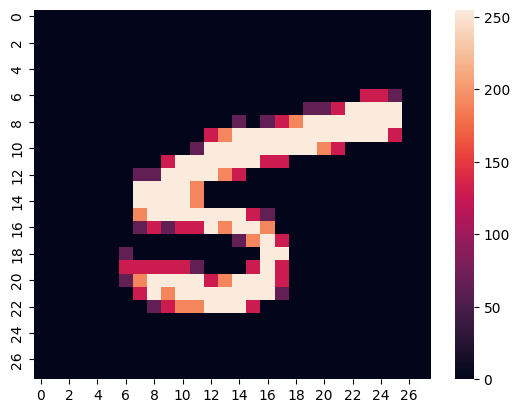

In [5]:
# Affichons un exemple de 5
image_to_display = X.iloc[3613].to_numpy().reshape(28, 28)
sns.heatmap(image_to_display)

In [6]:
y[36000]

'9'

### Séparer les données en un jeu d'entraînement et un jeu de test

In [7]:
X_train,X_test,y_train,y_test =X[:60000],X[60000:],y[:60000], y[60000:]

### Mélanger les données d'entraînement

In [8]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

### Créer deux vecteurs de booléens

In [9]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

### SGDC

In [10]:
# Nous entraînons un classificateur Stochastic Gradient Descent (SGD) sur un ensemble de données binaire, c'est-à-dire que nous allons seulement chercher à distinguer les 5 des autres chiffres.
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train_5)
model.score(X_test, y_test_5)

0.9662

In [11]:
test_predict_9 = model.predict([X.iloc[36000]])[0]
test_predict_5 = model.predict([X.iloc[3613]])[0]
test_predict_9, test_predict_5
print(f"Valeur à prédire 9 valeur prédit : {test_predict_9}.\nValeur à prédire 5 valeur prédit : {test_predict_5}.")

Valeur à prédire 9 valeur prédit : False.
Valeur à prédire 5 valeur prédit : True.


### cross_val_score()

In [12]:
from sklearn.model_selection import cross_val_score
# cross_val_score c'est la validation croisée
cross_val_score(model, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9683, 0.9041, 0.9649])

### Never5Classifier

In [13]:
# aux d’exactitude de ce modèle Never5Classifier() 
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# La précision est de 90% car seulement 10% des images sont des 5

array([0.9089 , 0.91115, 0.9089 ])

In [14]:
# Matrice de confusion
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(model, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)


array([[52425,  2154],
       [ 1100,  4321]])

<Axes: >

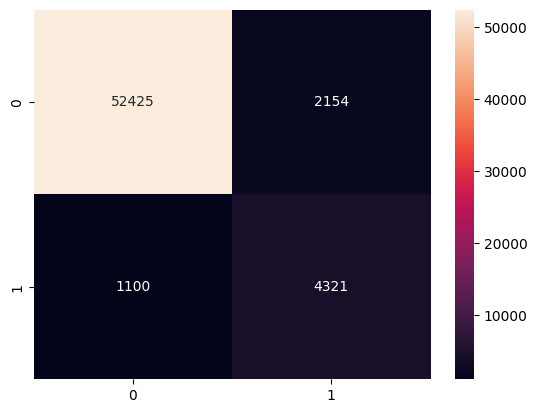

In [15]:
# show the confusion matrix
sns.heatmap(confusion_matrix(y_train_5, y_train_pred), annot=True, fmt='d')

In [16]:
# Utiliser ScikitLearn pour calculer les métrique précision et rappel.
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.6673359073359073

In [17]:
recall_score(y_train_5, y_train_pred)

0.7970854085961999

#### precision_score() & recal_score()
- precision_score() : 
c'est le rapport entre le nombre de vrais positifs et le nombre de vrais positifs plus le nombre de faux positifs

- recal_score() : 
c'est le taux de vrais positifs

#### Implémentation d’un classifier multiclasses

In [18]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8733

In [19]:
test_predict_9 = model.predict([X.iloc[36000]])[0]
test_predict_5 = model.predict([X.iloc[3613]])[0]
test_predict_9, test_predict_5
print(f"Valeur à prédire 9 valeur prédit : {test_predict_9}.\nValeur à prédire 5 valeur prédit : {test_predict_5}.")

Valeur à prédire 9 valeur prédit : 4.
Valeur à prédire 5 valeur prédit : 5.


<Axes: >

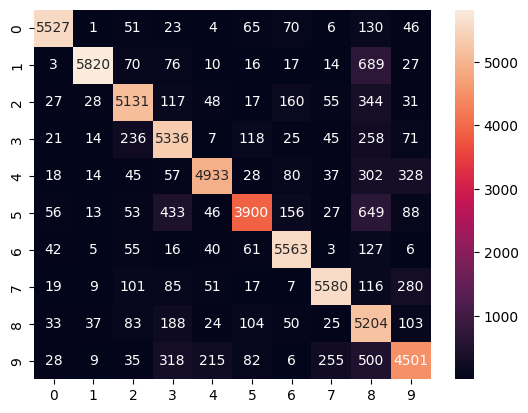

In [20]:
# Matrice de confusion & show 
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='d')

#### multiClasses OvO 

In [21]:
# Classifieur multiClasses OvO 
from sklearn.multiclass import OneVsOneClassifier
model = OneVsOneClassifier(SGDClassifier(random_state=42))
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9124

In [22]:
test_predict_9 = model.predict([X.iloc[36000]])[0]
test_predict_5 = model.predict([X.iloc[3613]])[0]
test_predict_9, test_predict_5
print(f"Valeur à prédire 9 valeur prédit : {test_predict_9}.\nValeur à prédire 5 valeur prédit : {test_predict_5}.")

Valeur à prédire 9 valeur prédit : 4.
Valeur à prédire 5 valeur prédit : 5.


In [23]:
len(model.estimators_) # model.estimators_ : c'est le nombre de classifieurs

45

<Axes: >

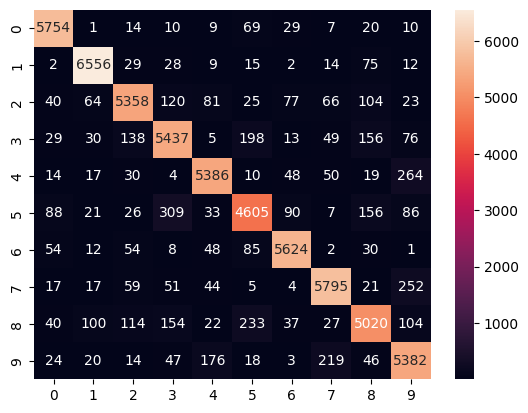

In [24]:
# Matrice de confusion & show
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='d')

#### Classifieur basé Foret Aléatoire

In [25]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9704

In [26]:
test_predict_9 = model.predict([X.iloc[36000]])[0]
test_predict_5 = model.predict([X.iloc[3613]])[0]
test_predict_9, test_predict_5
print(f"Valeur à prédire 9 valeur prédit : {test_predict_9}.\nValeur à prédire 5 valeur prédit : {test_predict_5}.")

Valeur à prédire 9 valeur prédit : 9.
Valeur à prédire 5 valeur prédit : 5.


Nous pouvons remarrquer que le classifieur basé sur les forets aléatoires est plus performant que les autres classifieurs car il a réussi à prédire les deux chiffres 9 alors que les autres avait prédit un 4. Puis son score est de 96%.

<Axes: >

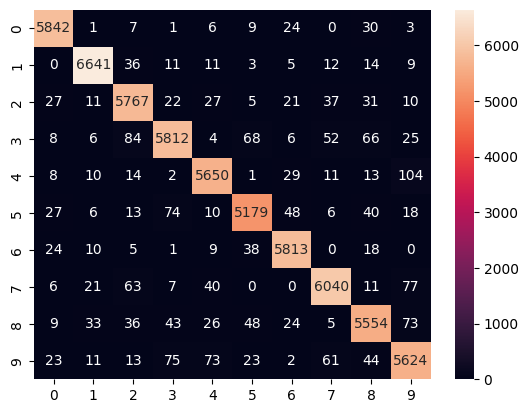

In [27]:
# matrice de confusion
y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_mx, annot=True, fmt='d')

#### Obtention des probabilités attribuées aux différentes classes. : predict_proba

In [28]:
model.predict_proba([X.iloc[36000]])

array([[0.  , 0.02, 0.  , 0.  , 0.11, 0.  , 0.  , 0.  , 0.  , 0.87]])

#### Evaluation des classifiers

In [29]:
cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")

array([0.96655, 0.96535, 0.9676 ])